In [1]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:20,.2f}'.format

RENT = 1100
EXPENDABLE_INCOME = 2000
TAXES_PCT = 1
INTEREST_RATE_PCT = 3
RESERVES_PCT = 1
PROPERTY_BUY_VALUE = 500000
CAPTIAL = 100000
BUY_VALUE = 500000
EXPECTED_STOCK_MARKET_RETURNS = 0.05
EXPECTED_HOUSING_MARKET_RETURNS = 0.03


def buy_by_year(year):
    #-CAPTIAL + 
    return year ** 2


def calc_rent_stock_returns(max_year, captial, exp_stock_returns, expendable_income, rent):
    depot = (1 + exp_stock_returns/12) * np.ones(max_year * 12)
    depot = np.cumprod(depot) / (1 + exp_stock_returns/12)
    depot = ((expendable_income - rent) * depot)
    depot = np.cumsum(depot)
    depot = depot.reshape(max_year,12)[:,11]


    start_captial = (1 + exp_stock_returns/12) * np.ones(max_year * 12)
    start_captial = np.cumprod(start_captial) * captial 
    start_captial = start_captial.reshape(max_year,12)[:,11]

    depot += start_captial
    
    return depot


def calc_rent_spent(max_year, rent, exp_rent_increase):
    rent_increase = (1 + exp_rent_increase) * np.ones(max_year)
    rent_increase = np.cumprod(rent_increase) / (1 + exp_rent_increase)
    rent_spent = np.cumsum(rent * 12 * rent_increase)

    return rent_spent


def calc_table(max_year, rent=1100, expendable_income=2000, taxes=0.1,
               interest_rate=0.3, reserves_per_year=0.1, property_value=500000, capital=100000,
               avg_stock_market_returns=0.07, avg_housing_market_returns=0.03, exp_rent_increase=0.01):
    rentAmounts = []
    rentSpentAmounts = calc_rent_spent(max_year, rent, exp_rent_increase)
    rentStockReturnsAmounts = calc_rent_stock_returns(max_year, capital, avg_stock_market_returns, expendable_income, rent)
    buyAmounts = []
    for year in range(0, max_year):  #this is probaby slow. Can probably be faster in numpy
        rentAmounts.append(rentStockReturnsAmounts[year] - rentSpentAmounts[year])
        buyAmounts.append(buy_by_year(year))

    return pd.DataFrame({'buy': buyAmounts, 'rent': rentAmounts, 'rent_spent': rentSpentAmounts,
                         'rent_stock_returns': rentStockReturnsAmounts})

In [2]:
calc_table(60).tail()

,buy,rent,rent_spent,rent_stock_returns
55,3025,"11,532,222.94","984,468.96","12,516,691.90"
56,3136,"12,425,164.25","1,007,513.65","13,432,677.90"
57,3249,"13,384,091.81","1,030,788.79","14,414,880.60"
58,3364,"14,413,790.13","1,054,296.68","15,468,086.81"
59,3481,"15,519,389.74","1,078,039.64","16,597,429.38"


In [3]:
depot = (1 + 0.07/12) * np.ones(60 * 12)
depot = np.cumprod(depot) / (1 + 0.07/12)
depot = (200 * depot)
depot = np.cumsum(depot)
depot = depot.reshape(60,12)[:,11]


start_captial = (1 + 0.07/12) * np.ones(60 * 12)
start_captial = np.cumprod(start_captial) * 10000 
start_captial = start_captial.reshape(60,12)[:,11]

depot += start_captial
depot

array([  13201.41786649,   16634.2664894 ,   20315.27601684,
         24262.38602064,   28494.83292576,   33033.24375988,
         37899.73668015,   43118.02876712,   48713.55161098,
         54713.57525366,   61147.34109061,   68046.20438013,
         75443.78705465,   83376.14157886,   91881.92665301,
        101002.59561791,  110782.59847974,  121269.59853924,
        132514.70468097,  144572.72045493,  157502.41116415,
        171366.79026018,  186233.42644209,  202174.77295565,
        219268.52069764,  237597.97684602,  257252.47086143,
        278327.7898384 ,  300926.64532828,  325159.17390878,
        351143.47393973,  379006.1811209 ,  408883.08565707,
        440919.79403789,  475272.43865793,  512108.43873518,
        551607.31623644,  593961.57078599,  639377.61782154,
        688076.79456945,  740296.4387421 ,  796291.04521428,
        856333.50631585,  920716.44178525,  989753.6248655 ,
       1063781.51149271, 1143160.88002981, 1228278.58953678,
       1319549.46514631,

In [6]:
import matplotlib.pyplot as plt

from matplotlib.figure import Figure


def plot(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital,
         avg_stock_market_returns, avg_housing_market_returns, exp_rent_increase):
    df = calc_table(max_year, rent, expendable_income, taxes, interest_rate, reserves_per_year, property_value, capital,
                    avg_stock_market_returns, avg_housing_market_returns, exp_rent_increase)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()
    plt.plot(df["rent"], label="rent")
    plt.plot(df["rent_spent"], label="rent spent")
    plt.plot(df["rent_stock_returns"], label="rent stock returns")
    plt.ticklabel_format(style='plain')
    plt.legend()
    return fig

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] IntSlider(end=60, name='max_year', value=60)
            [1] IntSlider(end=3000, name='rent', start=800, step=50, value=1100)
            [2] IntSlider(end=3000, name='expendable_income', start=1500, step=100, value=2000)
            [3] FloatSlider(end=0.30000000000000004, name='taxes', start=-0.1, value=0.1)
            [4] FloatSlider(end=0.8999999999999999, name='interest_rate', start=-0.3, value=0.3)
            [5] FloatSlider(end=0.30000000000000004, name='reserves_per_year', start=-0.1, value=0.1)
            [6] IntSlider(end=1500000, name='property_value', start=250000, step=10000, value=500000)
            [7] IntSlider(end=500000, name='capital', start=50000, step=10000, value=100000)
            [8] FloatSlider(end=0.2, name='avg_stock_market_returns'..., step=0.01, value=0.07)
            [9] FloatSlider(end=0.09, name='avg_housing_market_return..., start=-0.03, value=0.03)
            [10] FloatSlider(name='exp_rent_increase', step=0.01, value=0.01)
        [1] Row
            [0] Matplotlib(Figure, height=1080, name='interactive00172', width=1080)
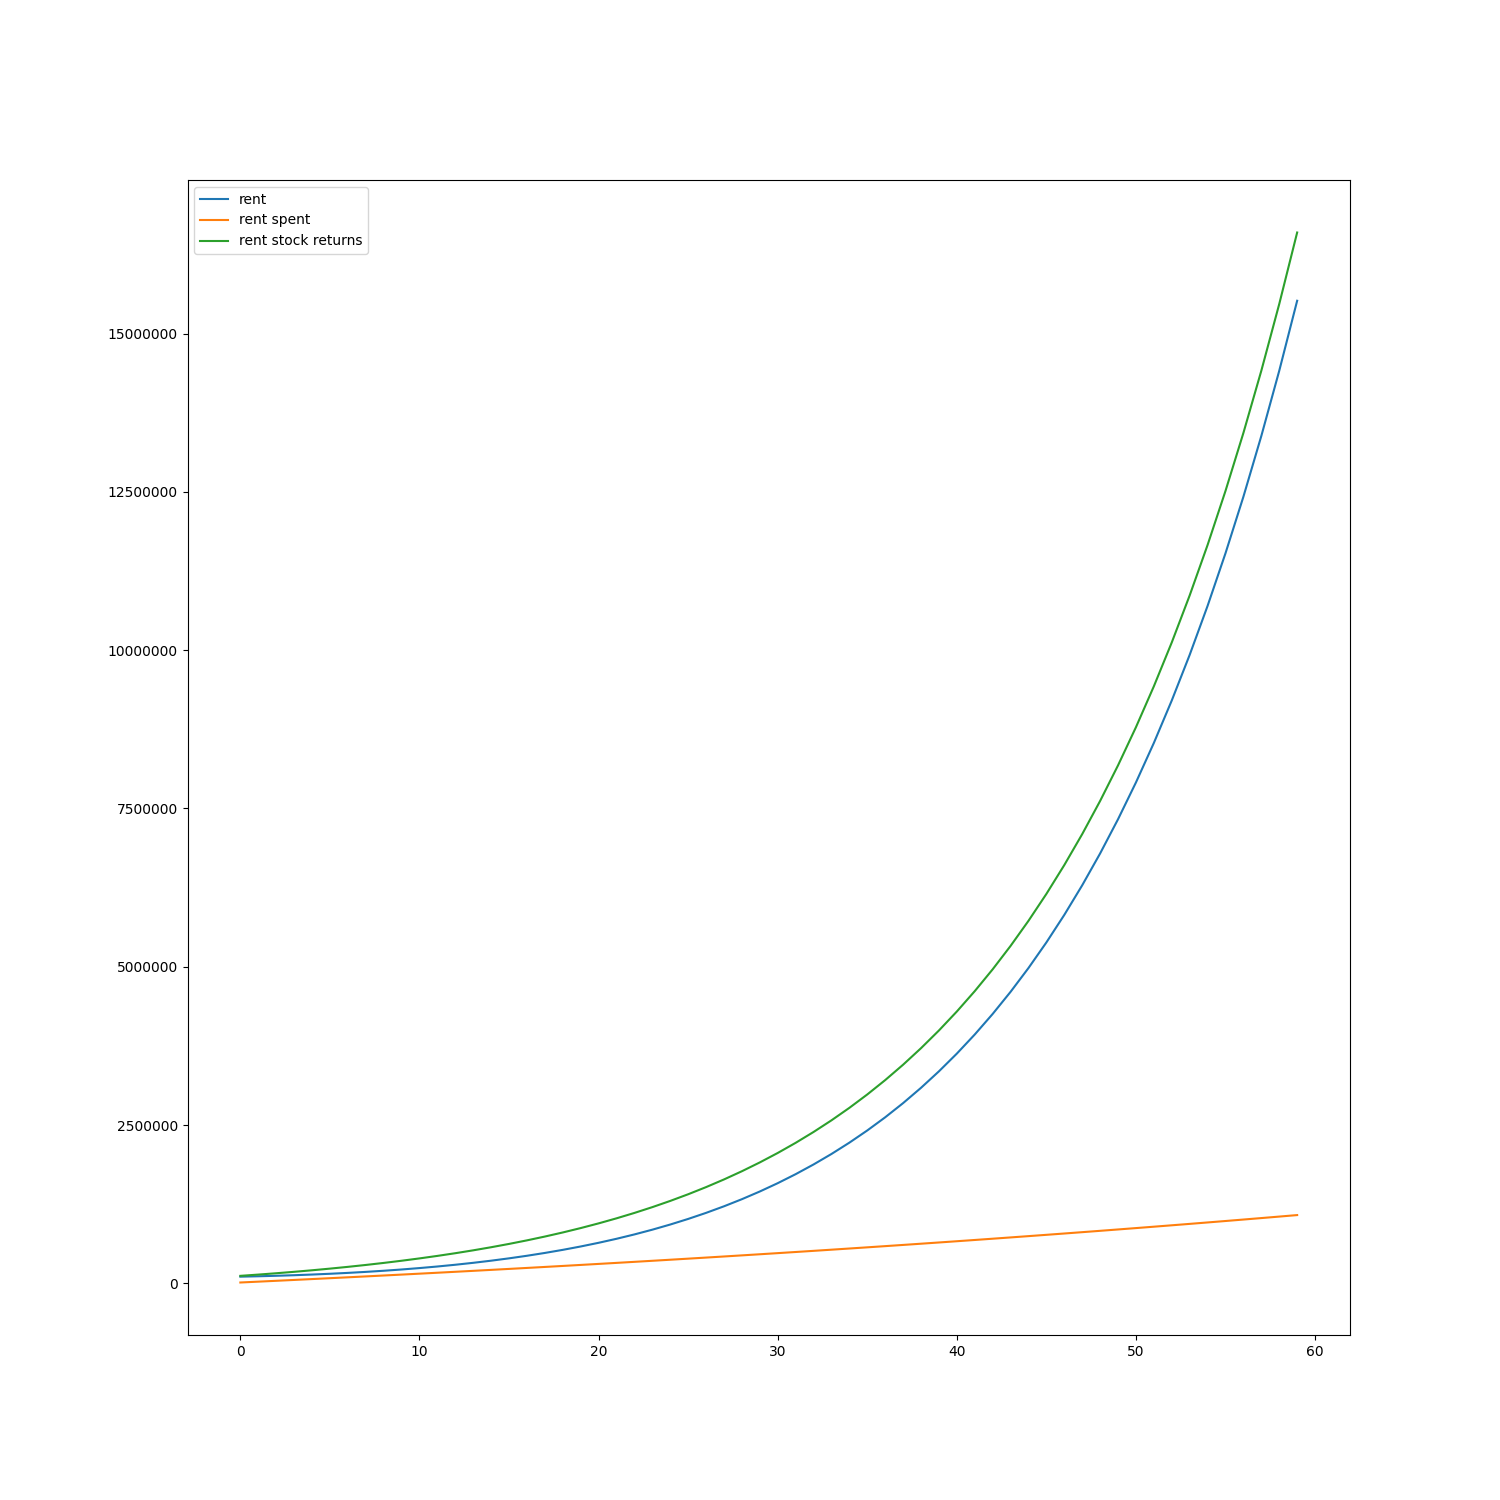

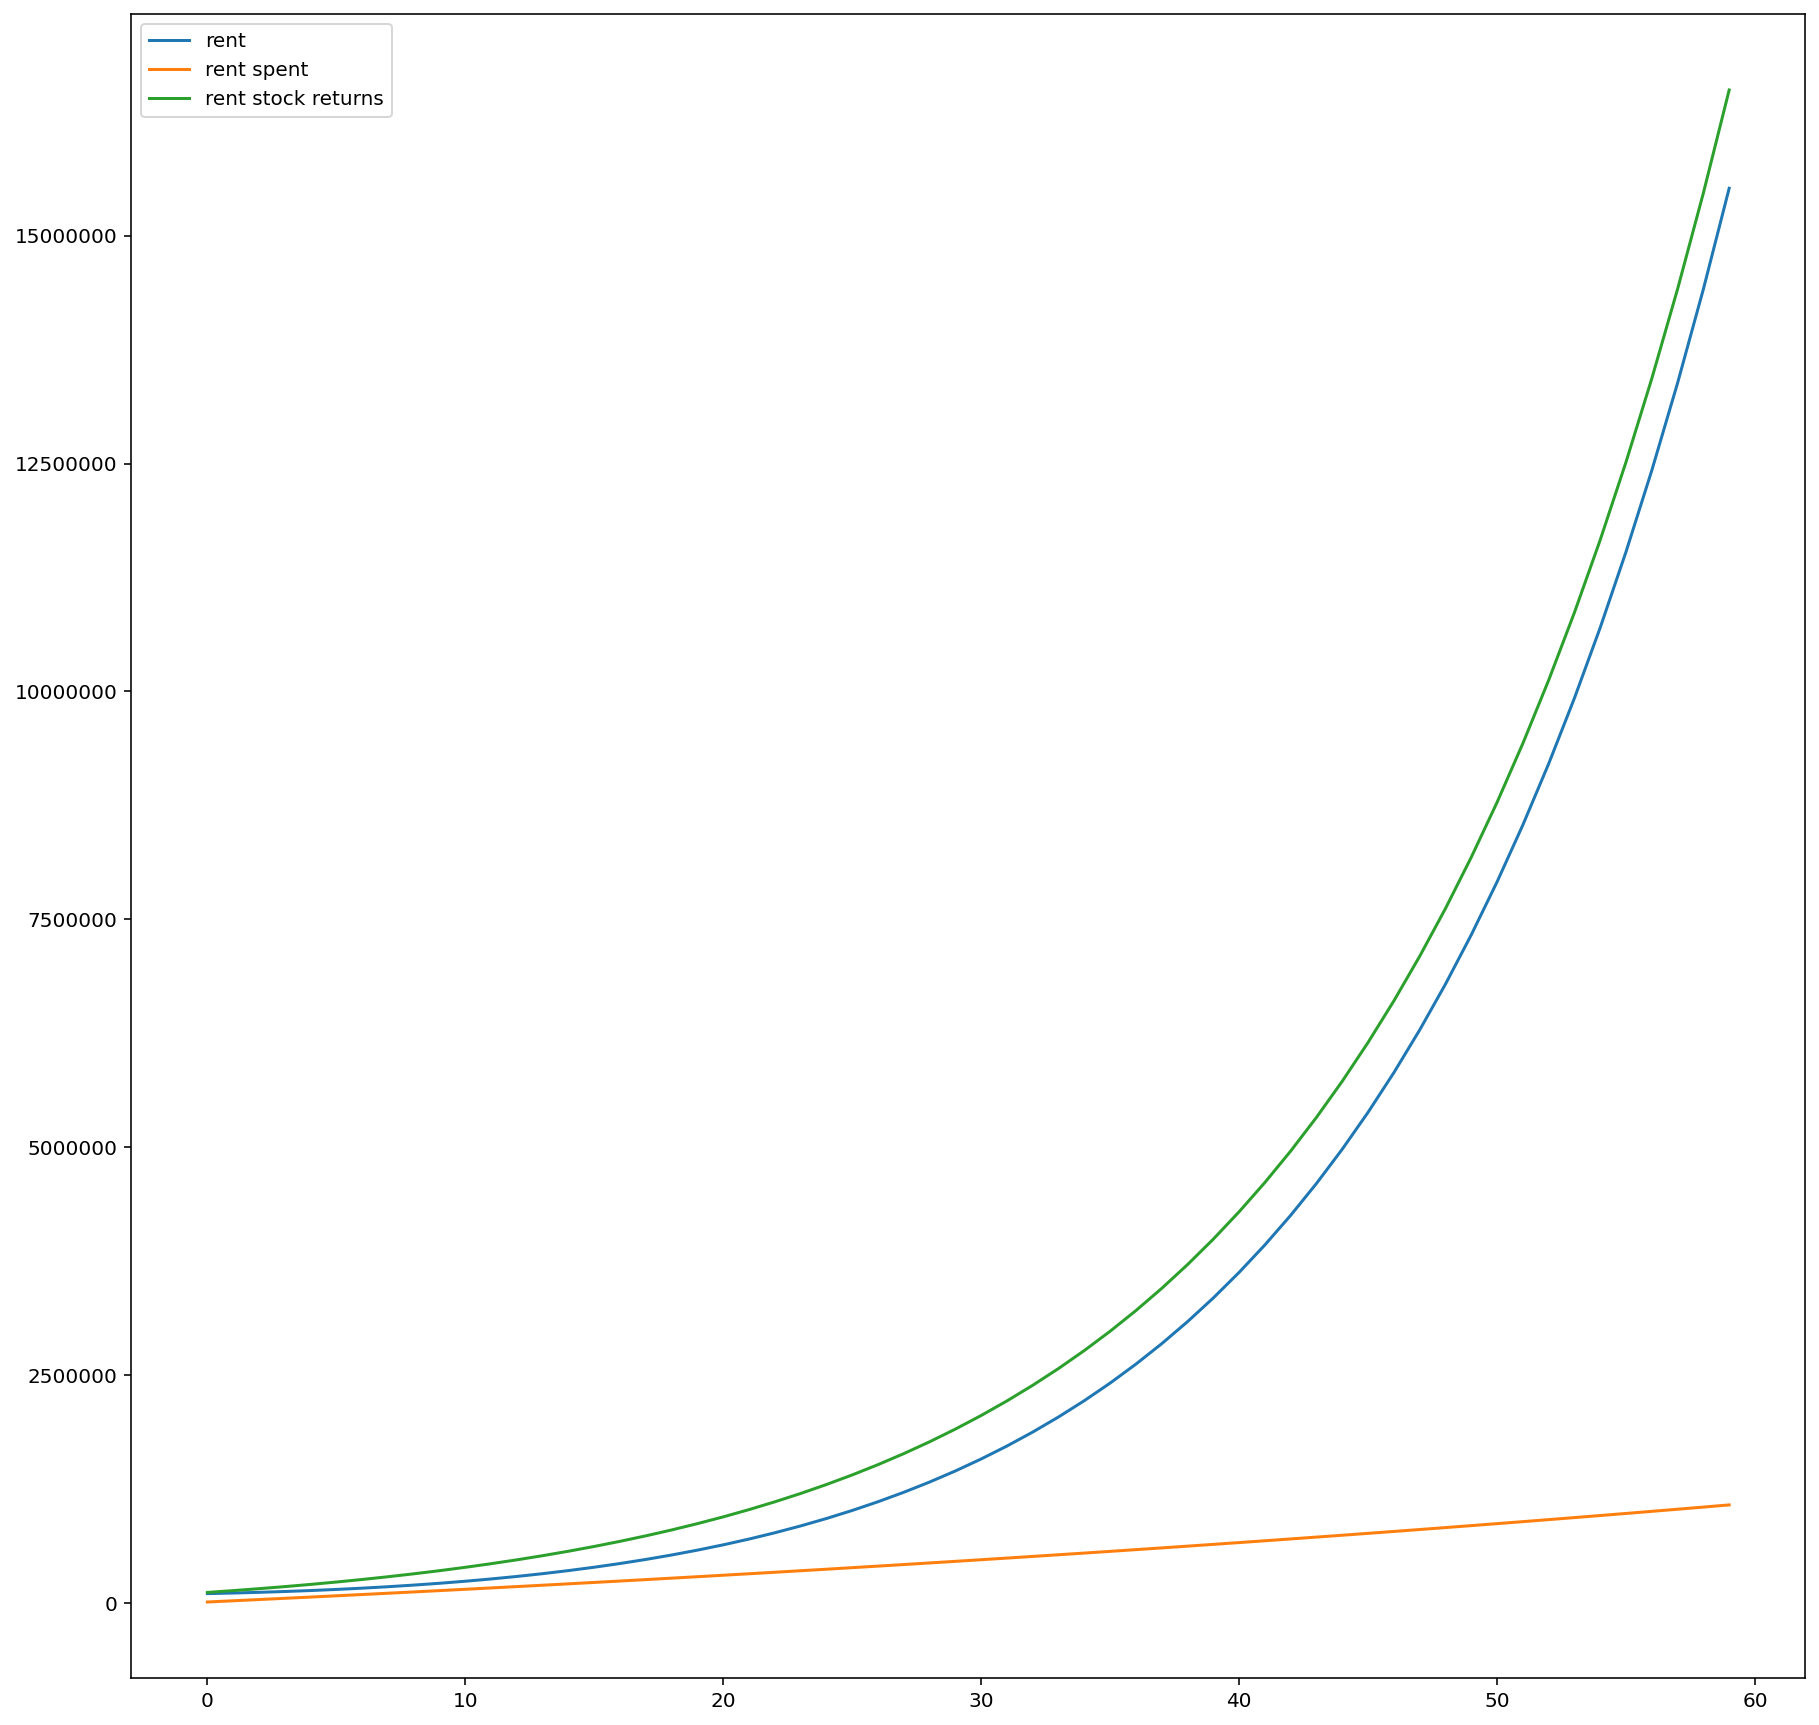

In [8]:
import panel as pn

from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()

layout = interact(plot, max_year=(0, 60, 1, 60), rent=(800, 3000, 50, 1100), expendable_income=(1500, 3000, 100, 2000),
                  taxes=0.01, interest_rate=0.03, reserves_per_year=0.01, property_value=(250000, 1500000, 10000, 500000),
                  capital=(50000, 500000, 10000, 100000), avg_stock_market_returns=(0,0.2,0.01,0.07), avg_housing_market_returns=0.03, exp_rent_increase=(0, 1, 0.01, 0.01))

pn.Column('Buy vs rent over time', pn.Row(layout[0], layout[1]))